In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.interpolate import interp1d
from numpy import random

# Creating data

In [2]:
X = [i for i in range(-51,51)]
y = [i**2 + random.randint(1000) for i in X ]
y = (y - np.mean(y))/(max(y) - min(y))

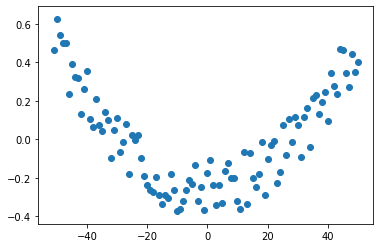

In [3]:
plt.scatter(X,y)

y = theta0 + theta1 * x1**2 + error

# Here is an idea of locally weighted regression

Rather then fitting a parabola on this data, We will fit more than 1 linear regression line. The "Frac" hyperparamter is important which means fraction of the data required to fit regression. Frac = 1 means it will take whole data to fit regression line

https://xavierbourretsicotte.github.io/loess.html

In [4]:
lowess = sm.nonparametric.lowess(y, X, frac=1)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

In [5]:
f = interp1d(lowess_x, lowess_y, bounds_error=False)

In [6]:
xnew = [i/10 for i in range(400)]

In [7]:
ynew = f(xnew)

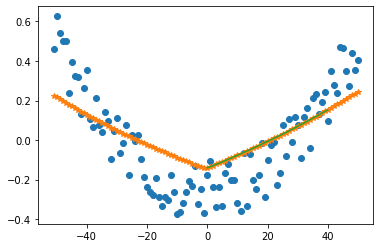

In [8]:
plt.plot(X, y, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

In [9]:
l = list(lowess_y)

In [10]:
res = []
for i in range(0,len(y)):
    res.append((l[i] - y[i])**2)

In [11]:
sum(res)

2.7393985724079033

In [12]:
frac = [1,.9,.8,.7,.6,.5,.4,.3,.2,.1]

frac =  1


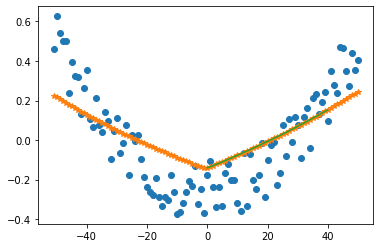

frac =  0.9


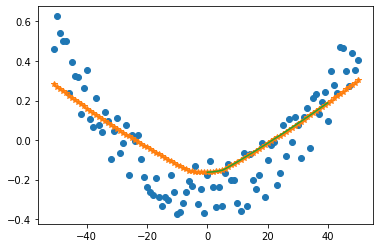

frac =  0.8


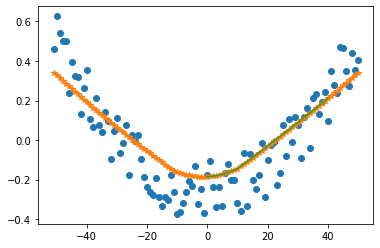

frac =  0.7


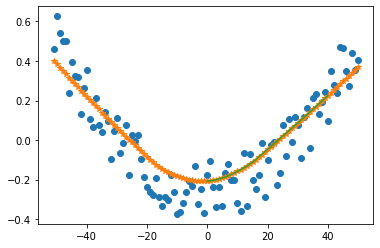

frac =  0.6


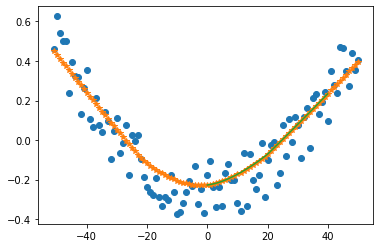

frac =  0.5


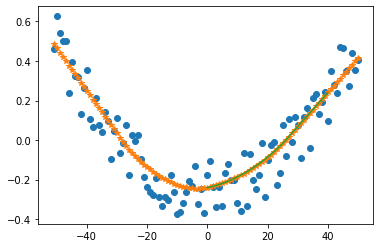

frac =  0.4


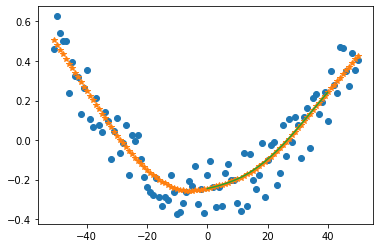

frac =  0.3


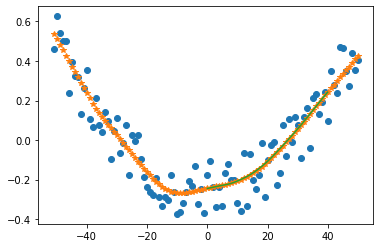

frac =  0.2


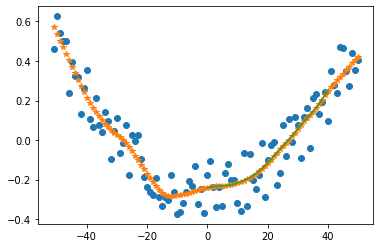

frac =  0.1


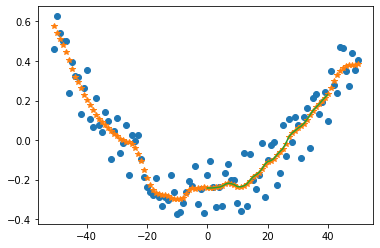

In [13]:
for k in frac:
    lowess = sm.nonparametric.lowess(y, X, frac = k)

# unpack the lowess smoothed points to their values
    lowess_x = list(zip(*lowess))[0]
    lowess_y = list(zip(*lowess))[1]
    f = interp1d(lowess_x, lowess_y, bounds_error=False)
    xnew = [i/10 for i in range(400)]
    ynew = f(xnew)
    print("frac = ",k)
    plt.plot(X, y, 'o')
    plt.plot(lowess_x, lowess_y, '*')
    plt.plot(xnew, ynew, '-')
    plt.show()